# Histogramas con Python

## Histogramas en python puro

In [1]:
x = (0,1,1,2,2,3,7,7,7,25)

In [25]:
# voy a crear una función que cuente los elementos
def count_elements(seq) -> dict:
    """
    Función que cuenta las frecuencias
    de aparición de cada elemento de la secuencia
    creando un diccionario como si fuese una
    tabla de frecuencias
    """
    hist = {}
    for i in seq:
        hist[i] = hist.get(i,0) + 1 
    return hist

In [26]:
fAbs = count_elements(x)

In [27]:
fAbs

{0: 1, 1: 2, 2: 2, 3: 1, 7: 3, 25: 1}

In [28]:
from collections import Counter

In [29]:
fAbs2 = Counter(x)

In [30]:
fAbs2 

Counter({0: 1, 1: 2, 2: 2, 3: 1, 7: 3, 25: 1})

In [31]:
fAbs.items() == fAbs.items()  # Comparación de los ítems de los diccionarios

True

In [34]:
def ascii_histogram(seq) -> None:
    """
    Un histograma de frecuencias absolutas
    colocado en horizontal y con caracteres ASCII
    """
    
    fAbs = count_elements(seq)
    for k in sorted(fAbs):
        print('{0:5d} {1}'. format(k, '+'*fAbs[k]))
      
    

In [35]:
ascii_histogram(x)

    0 +
    1 ++
    2 ++
    3 +
    7 +++
   25 +


In [63]:
import random
random.seed(2019)

In [64]:
vals = [1,2,3,4,5,7,8,9,10]
freqs = (random.randint(5,20) for _ in vals)

In [65]:
data = []
for k,v in zip(vals, freqs):
    data.extend([k]*v)
data

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10]

In [66]:
ascii_histogram(data)

    1 +++++++++
    2 ++++++++++++
    3 ++++++++++++++++++++
    4 ++++++++++
    5 ++++++++++++
    7 ++++++++++++
    8 +++++++++++++++
    9 ++++++++++++++
   10 ++++++++++++++++++


## Histogramas con NumPy

In [46]:
import numpy as np

In [4]:
np.random.seed(2019) # acá definimos la semilla

In [6]:
np.set_printoptions(precision=3) # code cuando quiera definir el n de decimales en los resultados

In [10]:
x = np.random.laplace(loc = 10, scale = 3, size=1000)

In [11]:
x[:10]

array([ 1.337,  6.358, 10.11 , 13.602, 18.232,  8.632, 12.587, -1.769,
       14.004, 10.668])

In [12]:
hist, bin_edges = np.histogram(x)

In [13]:
hist

array([  1,   4,  35, 153, 543, 215,  40,   7,   1,   1], dtype=int64)

In [14]:
bin_edges  # intervalos de la variable continua

array([-12.819,  -7.916,  -3.012,   1.892,   6.795,  11.699,  16.602,
        21.506,  26.409,  31.313,  36.217])

In [16]:
hist.size, bin_edges.size

(10, 11)

In [17]:
min_edge = x.min()
max_edge = x.max()

In [18]:
n_bins = 10
bin_edges = np.linspace(start = min_edge, stop = max_edge, num = n_bins + 1, endpoint = True) # creando las divisiones

In [19]:
bin_edges

array([-12.819,  -7.916,  -3.012,   1.892,   6.795,  11.699,  16.602,
        21.506,  26.409,  31.313,  36.217])

In [25]:
# contar el número de apariciones de cada uno de los datos
x = (0,1,1,1,2,2,3,7,7,7,25)
bcount = np.bincount(x)
bcount


array([1, 3, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int64)

In [26]:
hist, _ = np.histogram(x, range=(0,max(x)), bins = max(x)+1) # es similar a bcount

In [27]:
hist

array([1, 3, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int64)

In [28]:
dict(zip(np.unique(x),bcount))

{0: 1, 1: 3, 2: 2, 3: 1, 7: 0, 25: 0}

## Visualización de Histogramas

In [47]:
import matplotlib.pyplot as plt

In [31]:
np.random.seed(2019)
x = np.random.laplace(loc=10, scale=3, size=1000) # loc es el mu y scale es el lambda

Text(-10, 80, '$\\mu = 10, b = 3$')

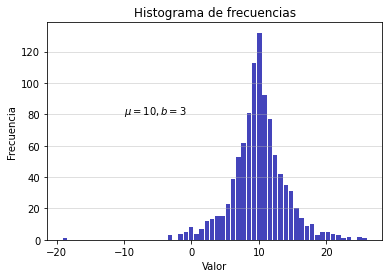

In [36]:
n, bins, patches =  plt.hist(x = x, bins = "auto", color ="#0505a5", alpha = 0.75, rwidth =0.85)
plt.grid(axis ='y', alpha = 0.5)
plt.ylabel("Frecuencia")
plt.xlabel("Valor")
plt.title("Histograma de frecuencias")
plt.text(-10,80, r'$\mu = 10, b = 3$')

In [37]:
n

array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,
         4.,   5.,   8.,   4.,   7.,  12.,  13.,  15.,  15.,  23.,  39.,
        53.,  62.,  81., 113., 132.,  92.,  77.,  54.,  42.,  35.,  31.,
        20.,  14.,   9.,  10.,   3.,   5.,   5.,   4.,   3.,   1.,   2.,
         0.,   2.,   1.])

In [38]:
bins

array([-19.167, -18.387, -17.606, -16.826, -16.046, -15.266, -14.486,
       -13.706, -12.926, -12.146, -11.366, -10.586,  -9.806,  -9.026,
        -8.246,  -7.466,  -6.685,  -5.905,  -5.125,  -4.345,  -3.565,
        -2.785,  -2.005,  -1.225,  -0.445,   0.335,   1.115,   1.895,
         2.675,   3.455,   4.236,   5.016,   5.796,   6.576,   7.356,
         8.136,   8.916,   9.696,  10.476,  11.256,  12.036,  12.816,
        13.596,  14.376,  15.157,  15.937,  16.717,  17.497,  18.277,
        19.057,  19.837,  20.617,  21.397,  22.177,  22.957,  23.737,
        24.517,  25.297,  26.077])

In [39]:
patches

<BarContainer object of 58 artists>

In [48]:
# trabajando con pandas
import pandas as pd

In [42]:
size, scale = 1000, 10
data = pd.Series(np.random.gamma(scale, size= size))

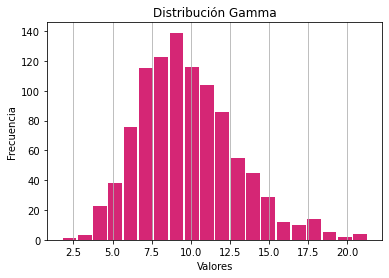

In [45]:
data.plot.hist(grid  =True, bins = 20, rwidth = 0.9, color = '#d52675')
plt.title('Distribución Gamma')
plt.ylabel("Frecuencia")
plt.xlabel("Valores")
plt.grid(axis = "y", alpha = 0.75)


# Funciones de densidad y de probabilidad

In [49]:
mu = 10, 20
sigma = 5, 2
dist = pd.DataFrame(np.random.normal(loc = mu, scale = sigma, size = (1000,2)), columns=['x1','x2'])

In [50]:
dist.agg(['min', 'max','mean','std']) # un cuadro resumen de nuestro dataframe

,x1,x2
min,-5.826791,13.843851
max,26.050512,27.173617
mean,9.955050,19.892540
std,4.974388,1.961254


<AxesSubplot:title={'center':'Histograma de dos normales'}, ylabel='Density'>

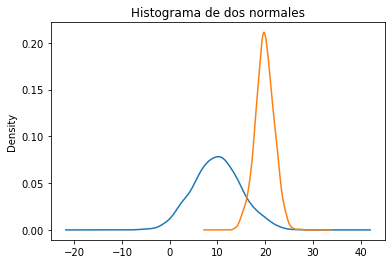

In [51]:
fig, ax=plt.subplots()
dist.plot.kde(ax=ax, legend = False, title = "Histograma de dos normales")

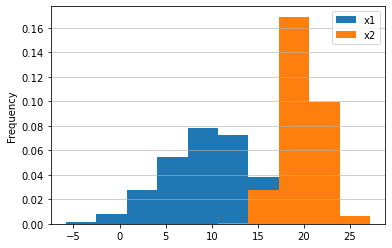

In [58]:
fig, ax=plt.subplots()           # haciendo un histograma
dist.plot.hist(density = True, ax = ax)
ax.grid(axis ="y", alpha = 0.75)

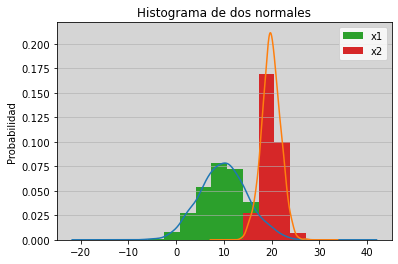

In [62]:
fig, ax=plt.subplots()   
dist.plot.kde(ax=ax, legend = False, title = "Histograma de dos normales") # con kde representamos las funciones de densidad
dist.plot.hist(density = True, ax = ax)
ax.set_ylabel("Probabilidad")
ax.grid(axis = "y", alpha = 0.75)
ax.set_facecolor("#d5d5d5")

In [63]:
from scipy import stats

In [64]:
dist = stats.norm # distribución normal estándar teórica N(0,1) ~ exp(-x**2/sqrt(2pi))

In [65]:
sample = dist.rvs(size = 1000)

In [67]:
x = np.linspace(start = stats.norm.ppf(0.01), stop = stats.norm.ppf(0.99), num= 250)

In [68]:
gkde = stats.gaussian_kde(dataset = sample)

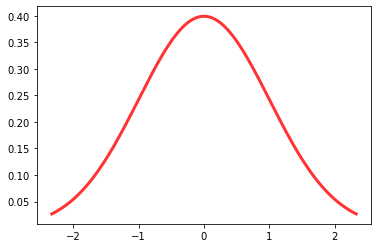

In [70]:
fig, ax = plt.subplots()
ax.plot(x, dist.pdf(x), linestyle = "solid", c = "red", lw=3, alpha = 0.8, label = "Distribución normal teórica")


Text(-2.0, 0.35, '$f(x) =\\frac{e^{-x^2/2}}{\\sqrt{2/pi}}}$')

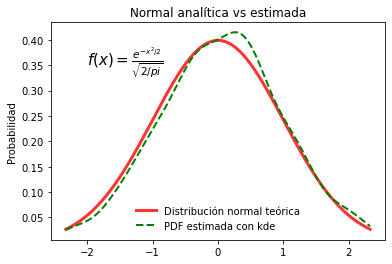

In [72]:
fig, ax = plt.subplots()
ax.plot(x, dist.pdf(x), linestyle = "solid", c = "red", lw=3, alpha = 0.8, label = "Distribución normal teórica")
ax.plot(x, gkde.evaluate(x), linestyle = "dashed", c = "green", lw = 2, label = "PDF estimada con kde")
ax.legend(loc="best", frameon = False)
ax.set_title("Normal analítica vs estimada")
ax.set_ylabel("Probabilidad")
ax.text(-2., 0.35, r'$f(x) =\frac{e^{-x^2/2}}{\sqrt{2/pi}}}$', fontsize = 15)

# Histogramas con seaborn

In [73]:
import seaborn as sb

C:\Users\sept\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

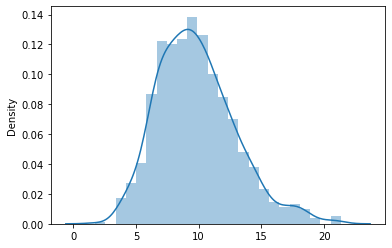

In [76]:
sb.distplot(data)

C:\Users\sept\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

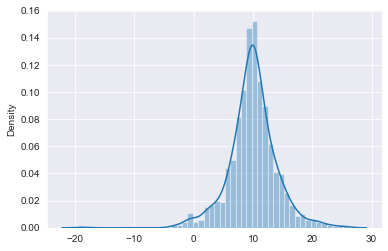

In [78]:
np.random.seed(2019)
x = np.random.laplace(loc = 10, scale = 3, size  = 1000)
sb.set_style("darkgrid")
sb.distplot(x)

C:\Users\sept\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

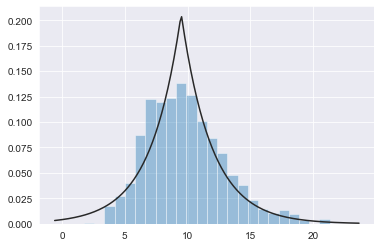

In [79]:
sb.distplot(data, fit = stats.laplace, kde = False)

## Otras formas

In [80]:
data2 = np.random.choice(np.arange(10), size =10000, p = np.linspace(1,11,10)/60)

In [81]:
s = pd.Series(data2)

In [82]:
s.value_counts()

9    1840
8    1622
7    1478
6    1276
5    1050
4     909
3     781
2     537
1     361
0     146
dtype: int64

In [83]:
s.value_counts(normalize = True) # frecuencia relativa

9    0.1840
8    0.1622
7    0.1478
6    0.1276
5    0.1050
4    0.0909
3    0.0781
2    0.0537
1    0.0361
0    0.0146
dtype: float64

In [85]:
ages = pd.Series([1,1,3,5,6,8,10,12,18,18,18,20,25,30,40,51,52])
bins = (0,10,15,18,21, np.inf)
labels = ('infancia', 'preadolescencia' ,'adolescencia', 'universitario', 'adulto' )
groups = pd.cut(ages, bins = bins, labels = labels)

In [86]:
groups

0            infancia
1            infancia
2            infancia
3            infancia
4            infancia
5            infancia
6            infancia
7     preadolescencia
8        adolescencia
9        adolescencia
10       adolescencia
11      universitario
12             adulto
13             adulto
14             adulto
15             adulto
16             adulto
dtype: category
Categories (5, object): ['infancia' < 'preadolescencia' < 'adolescencia' < 'universitario' < 'adulto']

In [87]:
groups.value_counts()

infancia           7
adulto             5
adolescencia       3
preadolescencia    1
universitario      1
dtype: int64

In [89]:
pd.concat((ages, groups), axis = 1).rename(columns = {0:'age', 1: 'group'})

,age,group
0,1,infancia
1,1,infancia
2,3,infancia
3,5,infancia
4,6,infancia
5,8,infancia
6,10,infancia
7,12,preadolescencia
8,18,adolescencia
9,18,adolescencia
